In [1]:
from sklearn.datasets import fetch_california_housing

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
california=fetch_california_housing()

In [5]:
california.keys() #columns

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [11]:
print(california.DESCR) #explanantion of the dataset

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [12]:
california.target_names #Dependent features

['MedHouseVal']

In [13]:
california.data #independent features

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [14]:
california.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [15]:
#lets prepare the dataset
df=pd.DataFrame(california.data,columns=california.feature_names)

In [19]:
df['Price']=california.target

<Axes: >

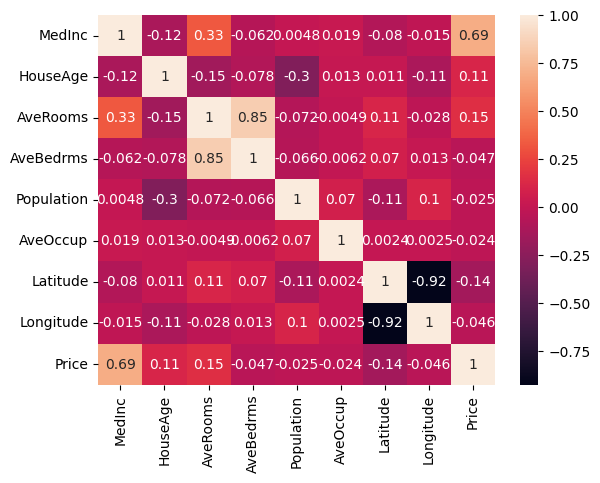

In [22]:
sns.heatmap(df.corr(),annot=True)

In [24]:
#I/P and D/P features
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [ ]:
#Split with train/test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=10)

In [29]:
# Scaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [30]:
#Model training
from sklearn.linear_model import LinearRegression
reg=LinearRegression()

reg.fit(X_train,y_train)

LinearRegression()

In [32]:
coefficient=reg.coef_

In [33]:
intercept=reg.intercept_

In [35]:
#prediction for the test data
y_pred=reg.predict(X_test)
y_pred

array([0.72563462, 1.76650223, 2.70545812, ..., 1.25803135, 1.66673014,
       2.25826279])

In [36]:
## Performance Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(np.sqrt(mean_squared_error(y_test,y_pred)))

0.5369686543372459
0.5295710106684453
0.7327814505957735


Text(0, 0.5, 'The predicted data')

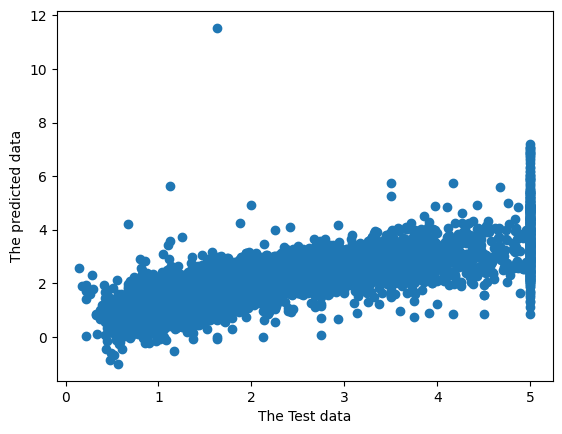

In [38]:
#Assumptions
plt.scatter(y_test,y_pred)
plt.xlabel('The Test data')
plt.ylabel('The predicted data')

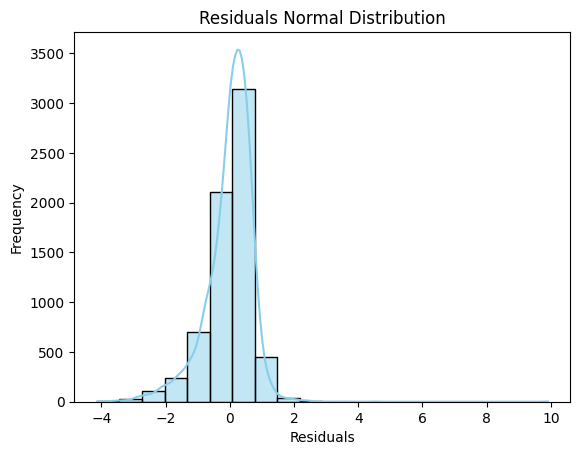

In [42]:
#residuals
residuals=y_pred-y_test

sns.histplot(residuals, kde=True, bins=20, color="skyblue")
plt.title("Residuals Normal Distribution")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

In [44]:
#Pickling
import pickle
pickle.dump(reg,open('regression.pkl','wb'))

In [45]:
model=pickle.load(open('regression.pkl','rb'))
model.predict(X_test)

array([0.72563462, 1.76650223, 2.70545812, ..., 1.25803135, 1.66673014,
       2.25826279])